In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train = pd.read_csv('../Dataset/store-sales-time-series-forecasting/train.csv')
test = pd.read_csv('../Dataset/store-sales-time-series-forecasting/test.csv')
store = pd.read_csv('../Dataset/store-sales-time-series-forecasting/stores.csv')
oil = pd.read_csv('../Dataset/store-sales-time-series-forecasting/oil.csv')
holidays_events = pd.read_csv('../Dataset/store-sales-time-series-forecasting/holidays_events.csv')
transaction = pd.read_csv('../Dataset/store-sales-time-series-forecasting/transactions.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [4]:
train

id        date  store_nbr                      family     sales  \
0              0  2013-01-01          1                  AUTOMOTIVE     0.000   
1              1  2013-01-01          1                   BABY CARE     0.000   
2              2  2013-01-01          1                      BEAUTY     0.000   
3              3  2013-01-01          1                   BEVERAGES     0.000   
4              4  2013-01-01          1                       BOOKS     0.000   
...          ...         ...        ...                         ...       ...   
3000883  3000883  2017-08-15          9                     POULTRY   438.133   
3000884  3000884  2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885  2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887  2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 6 columns]

In [5]:
test

id        date  store_nbr                      family  onpromotion
0      3000888  2017-08-16          1                  AUTOMOTIVE            0
1      3000889  2017-08-16          1                   BABY CARE            0
2      3000890  2017-08-16          1                      BEAUTY            2
3      3000891  2017-08-16          1                   BEVERAGES           20
4      3000892  2017-08-16          1                       BOOKS            0
...        ...         ...        ...                         ...          ...
28507  3029395  2017-08-31          9                     POULTRY            1
28508  3029396  2017-08-31          9              PREPARED FOODS            0
28509  3029397  2017-08-31          9                     PRODUCE            1
28510  3029398  2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9
28511  3029399  2017-08-31          9                     SEAFOOD            0

[28512 rows x 5 columns]

In [6]:
# 商品ジャンルの一覧を出す
train["family"].value_counts()

AUTOMOTIVE                    90936
HOME APPLIANCES               90936
SCHOOL AND OFFICE SUPPLIES    90936
PRODUCE                       90936
PREPARED FOODS                90936
POULTRY                       90936
PLAYERS AND ELECTRONICS       90936
PET SUPPLIES                  90936
PERSONAL CARE                 90936
MEATS                         90936
MAGAZINES                     90936
LIQUOR,WINE,BEER              90936
LINGERIE                      90936
LAWN AND GARDEN               90936
LADIESWEAR                    90936
HOME CARE                     90936
HOME AND KITCHEN II           90936
BABY CARE                     90936
HOME AND KITCHEN I            90936
HARDWARE                      90936
GROCERY II                    90936
GROCERY I                     90936
FROZEN FOODS                  90936
EGGS                          90936
DELI                          90936
DAIRY                         90936
CLEANING                      90936
CELEBRATION                 

In [7]:
# 商品ジャンルの種類の数を出す
train["family"].nunique()

33

In [8]:
# 各商品ジャンルの数が90936と綺麗に一致するのが気になる
print(33*90936)

3000888


In [9]:
# 各商品がどれくらい売り上げるのか
pd.options.display.float_format = '{:.2f}'.format
print("Sales amount: " + str(train["sales"].sum()))
train[["family", "sales"]].groupby("family").sum().sort_values("sales", ascending=False)

Sales amount: 1073644952.2030689


sales
family                                 
GROCERY I                  343462734.89
BEVERAGES                  216954486.00
PRODUCE                    122704684.68
CLEANING                    97521289.00
DAIRY                       64487709.00
BREAD/BAKERY                42133945.58
POULTRY                     31876004.47
MEATS                       31086468.40
PERSONAL CARE               24592051.00
DELI                        24110322.47
HOME CARE                   16022744.00
EGGS                        15588296.00
FROZEN FOODS                14073887.72
PREPARED FOODS               8799895.12
LIQUOR,WINE,BEER             7746640.00
SEAFOOD                      2015431.88
GROCERY II                   1962767.00
HOME AND KITCHEN I           1861491.00
HOME AND KITCHEN II          1520670.00
CELEBRATION                   761177.00
LINGERIE                      653114.00
LADIESWEAR                    651159.00
PLAYERS AND ELECTRONICS       562608.00
AUTOMOTIVE                    554822.00
LAWN AND GARDEN               548842.00
PET SUPPLIES                  356584.00
BEAUTY                        337893.00
SCHOOL AND OFFICE SUPPLIES    269316.00
MAGAZINES                     266359.00
HARDWARE                      103470.00
HOME APPLIANCES                41601.00
BABY CARE                      10051.00
BOOKS                           6438.00

In [10]:
oil["date"] = pd.to_datetime(oil["date"])

date_range = pd.date_range(start='1/1/2013', end='8/31/2017', freq='D')
date_range = pd.DataFrame(date_range, columns=["date"])
oil = date_range.merge(oil, on="date", how="left")

<AxesSubplot:xlabel='date'>

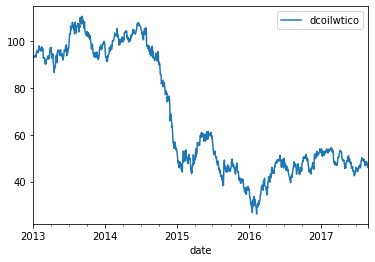

In [11]:
oil.set_index('date').interpolate(limit=3, limit_direction='backward').plot()

In [12]:
# 2013年～2017年の各月ごとの売り上げ推移をみる
train_info = train[["date", "family", "sales"]]
train_info["date"] = pd.to_datetime(train_info["date"])
train_info["date_monthly"] = train_info['date'].dt.strftime('%Y-%m')
# train_info = train_info.set_index("date")
# train_info.resample("M").sum()
sales_family_monthly = pd.pivot_table(train_info, values='sales', index='family', columns='date_monthly', aggfunc='sum', fill_value=0)
sales_family_monthly

C:\Users\seiju\AppData\Local\Temp\ipykernel_10056\3400593323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_info["date"] = pd.to_datetime(train_info["date"])
C:\Users\seiju\AppData\Local\Temp\ipykernel_10056\3400593323.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_info["date_monthly"] = train_info['date'].dt.strftime('%Y-%m')


date_monthly                  2013-01    2013-02    2013-03    2013-04  \
family                                                                   
AUTOMOTIVE                    6557.00    7220.00    7635.00    7485.00   
BABY CARE                        0.00       0.00       0.00       0.00   
BEAUTY                        4019.00    3747.00    3901.00    3670.00   
BEVERAGES                  1670653.00 1508254.00 1822220.00 1743121.00   
BOOKS                            0.00       0.00       0.00       0.00   
BREAD/BAKERY                549778.86  499809.40  594024.80  568623.22   
CELEBRATION                      0.00       0.00       0.00       0.00   
CLEANING                   1448851.00 1302978.00 1505390.00 1421226.00   
DAIRY                       523737.00  499873.00  612508.00  559590.00   
DELI                        304217.24  283769.43  327257.45  316163.71   
EGGS                        203442.00  190424.00  225027.00  208200.00   
FROZEN FOODS                118057.14   98706.20  135552.36  145692.05   
GROCERY I                  4032240.00 3919400.00 4679847.00 4554014.00   
GROCERY II                   27039.00   25304.00   29500.00   29395.00   
HARDWARE                      1612.00    1414.00    1582.00    1423.00   
HOME AND KITCHEN I               0.00       0.00       0.00       0.00   
HOME AND KITCHEN II              0.00       0.00       0.00       0.00   
HOME APPLIANCES                210.00     119.00    1137.00    1067.00   
HOME CARE                        0.00       0.00       0.00       0.00   
LADIESWEAR                       0.00       0.00       0.00       0.00   
LAWN AND GARDEN               3808.00    3625.00    4413.00    4029.00   
LINGERIE                     18266.00   15453.00   13302.00   12736.00   
LIQUOR,WINE,BEER             88568.00   99682.00  106233.00   92334.00   
MAGAZINES                        0.00       0.00       0.00       0.00   
MEATS                       533154.78  480354.96  525533.34  521173.16   
PERSONAL CARE               317716.00  274064.00  319254.00  326543.00   
PET SUPPLIES                     0.00       0.00       0.00       0.00   
PLAYERS AND ELECTRONICS          0.00       0.00       0.00       0.00   
POULTRY                     304256.84  284366.36  318799.46  305240.52   
PREPARED FOODS              136488.05  127108.54  151266.29  131131.68   
PRODUCE                          0.00       0.00    4037.00    6308.00   
SCHOOL AND OFFICE SUPPLIES       0.00       0.00       0.00       0.00   
SEAFOOD                      34953.83   33287.89   40077.33   34299.40   

date_monthly                  2013-05    2013-06    2013-07    2013-08  \
family                                                                   
AUTOMOTIVE                    9034.00    8311.00    8508.00    8164.00   
BABY CARE                        0.00       0.00       0.00       0.00   
BEAUTY                        3716.00    3842.00    4780.00    4720.00   
BEVERAGES                  1824123.00 1829106.00 1664465.00 1810927.00   
BOOKS                            0.00       0.00       0.00       0.00   
BREAD/BAKERY                616045.65  607785.69  568490.33  574358.37   
CELEBRATION                      0.00       0.00       0.00       0.00   
CLEANING                   1486295.00 1483938.00 1420483.00 1462219.00   
DAIRY                       595657.00  590898.00  576927.00  572921.00   
DELI                        347293.37  335910.18  298614.00  325416.42   
EGGS                        229575.00  220594.00  209272.00  216552.00   
FROZEN FOODS                150769.85  170314.65  163838.43  163100.41   
GROCERY I                  4806099.00 4919672.00 4861947.00 5077610.00   
GROCERY II                   32690.00   30786.00   30109.00   31022.00   
HARDWARE                      1431.00    1339.00    1164.00    1554.00   
HOME AND KITCHEN I               0.00       0.00       0.00       0.00   
HOME AND KITCHEN II              0.00       0.00       0.00       0.00   
HOM

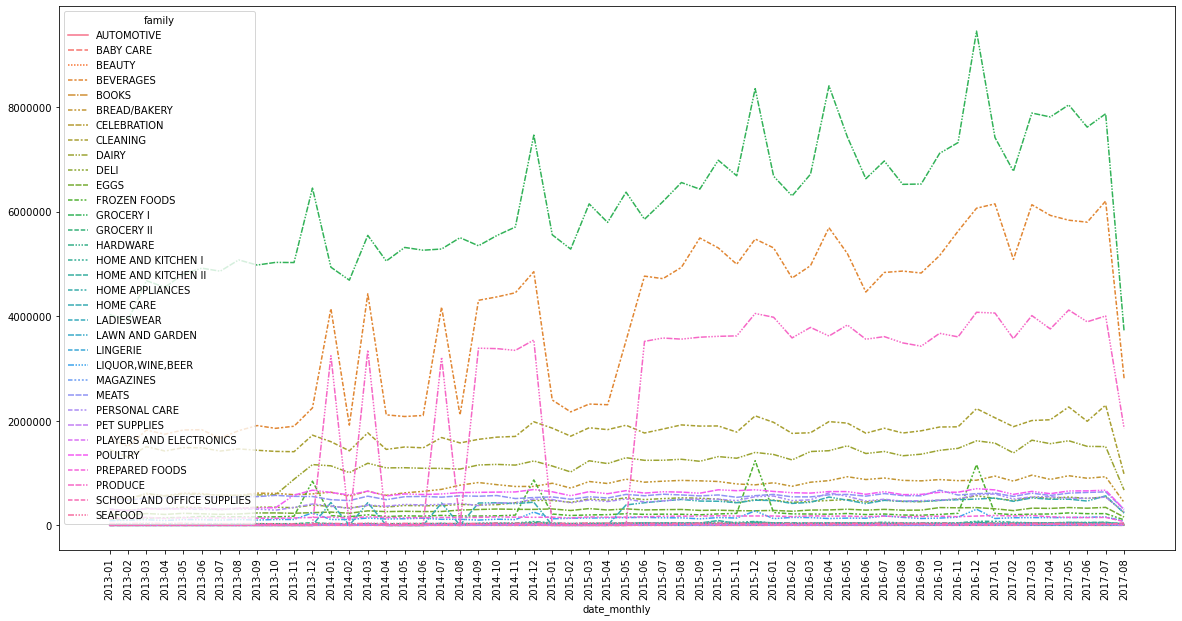

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,10))
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain',axis='y')
# sns.relplot(x='date_monthly', y='family', data=sales_family_monthly, kind='line')
sns.lineplot(data=sales_family_monthly.T)
plt.show()

# 期間は2017年8月15日までなので、8月の売り上げが下がっているように見えるのは妥当である。

In [14]:
train

id        date  store_nbr                      family   sales  \
0              0  2013-01-01          1                  AUTOMOTIVE    0.00   
1              1  2013-01-01          1                   BABY CARE    0.00   
2              2  2013-01-01          1                      BEAUTY    0.00   
3              3  2013-01-01          1                   BEVERAGES    0.00   
4              4  2013-01-01          1                       BOOKS    0.00   
...          ...         ...        ...                         ...     ...   
3000883  3000883  2017-08-15          9                     POULTRY  438.13   
3000884  3000884  2017-08-15          9              PREPARED FOODS  154.55   
3000885  3000885  2017-08-15          9                     PRODUCE 2419.73   
3000886  3000886  2017-08-15          9  SCHOOL AND OFFICE SUPPLIES  121.00   
3000887  3000887  2017-08-15          9                     SEAFOOD   16.00   

         onpromotion  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0  

[3000888 rows x 6 columns]

In [15]:
# 2013年～2017年の日ごとの売り上げ推移をみる
train_info = train[["date", "family", "sales"]]
train_info["date"] = pd.to_datetime(train_info["date"])
sales_family_daily = pd.pivot_table(train_info, values='sales', index='family', columns='date', aggfunc='sum', fill_value=0)
sales_family_daily 

C:\Users\seiju\AppData\Local\Temp\ipykernel_10056\1438381167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_info["date"] = pd.to_datetime(train_info["date"])


date                        2013-01-01  2013-01-02  2013-01-03  2013-01-04  \
family                                                                       
AUTOMOTIVE                        0.00      255.00      161.00      169.00   
BABY CARE                         0.00        0.00        0.00        0.00   
BEAUTY                            2.00      207.00      125.00      133.00   
BEVERAGES                       810.00    72092.00    52105.00    54167.00   
BOOKS                             0.00        0.00        0.00        0.00   
BREAD/BAKERY                    180.59    26246.32    18456.48    16721.97   
CELEBRATION                       0.00        0.00        0.00        0.00   
CLEANING                        186.00    74629.00    55893.00    52064.00   
DAIRY                           143.00    23381.00    18001.00    18148.00   
DELI                             71.09    15754.50    11172.45    10143.21   
EGGS                             46.00    10932.00     7358.00     6760.00   
FROZEN FOODS                     29.65     7115.39     4760.81     4525.93   
GROCERY I                       700.00   202020.00   144878.00   135754.00   
GROCERY II                       15.00     1476.00     1048.00     1031.00   
HARDWARE                          0.00       46.00       37.00       57.00   
HOME AND KITCHEN I                0.00        0.00        0.00        0.00   
HOME AND KITCHEN II               0.00        0.00        0.00        0.00   
HOME APPLIANCES                   0.00       21.00       15.00       13.00   
HOME CARE                         0.00        0.00        0.00        0.00   
LADIESWEAR                        0.00        0.00        0.00        0.00   
LAWN AND GARDEN                   2.00      121.00       83.00      127.00   
LINGERIE                          5.00      469.00      366.00      382.00   
LIQUOR,WINE,BEER                105.00     2411.00     2476.00     4796.00   
MAGAZINES                         0.00        0.00        0.00        0.00   
MEATS                           110.80    20871.46    16597.40    21625.96   
PERSONAL CARE                    25.00    17204.00    12568.00    11303.00   
PET SUPPLIES                      0.00        0.00        0.00        0.00   
PLAYERS AND ELECTRONICS           0.00        0.00        0.00        0.00   
POULTRY                          42.64    13975.88    10674.39    10772.52   
PREPARED FOODS                   37.85     5338.11     3591.39     4472.97   
PRODUCE                           0.00        0.00        0.00        0.00   
SCHOOL AND OFFICE SUPPLIES        0.00        0.00        0.00        0.00   
SEAFOOD                           0.00     1526.75     1094.31     1293.12   

date                        2013-01-05  2013-01-06  2013-01-07  2013-01-08  \
family                                                                       
AUTOMOTIVE                      342.00      360.00      189.00      229.00   
BABY CARE                         0.00        0.00        0.00        0.00   
BEAUTY                          191.00      265.00      124.00      116.00   
BEVERAGES                     77818.00    86184.00    51619.00    46941.00   
BOOKS                             0.00        0.00        0.00        0.00   
BREAD/BAKERY                  22367.76    26861.67    17646.15    15805.76   
CELEBRATION                       0.00        0.00        0.00        0.00   
CLEANING                      70128.00    74295.00    50036.00    45075.00   
DAIRY                         23082.00    23660.00    15839.00    14532.00   
DELI                          13734.95    16229.26     9647.74     8269.92   
EGGS                           8576.00    10933.00     6486.00     5575.00   
FROZEN FOODS                   5781.61     6114.88     3823.62     3484.75   
GROCERY I                    188356.00   207297.00   133189.00   133290.00   
GROCERY II                     1273.00     1306.00      846.00      746.00   
HARDWARE             

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


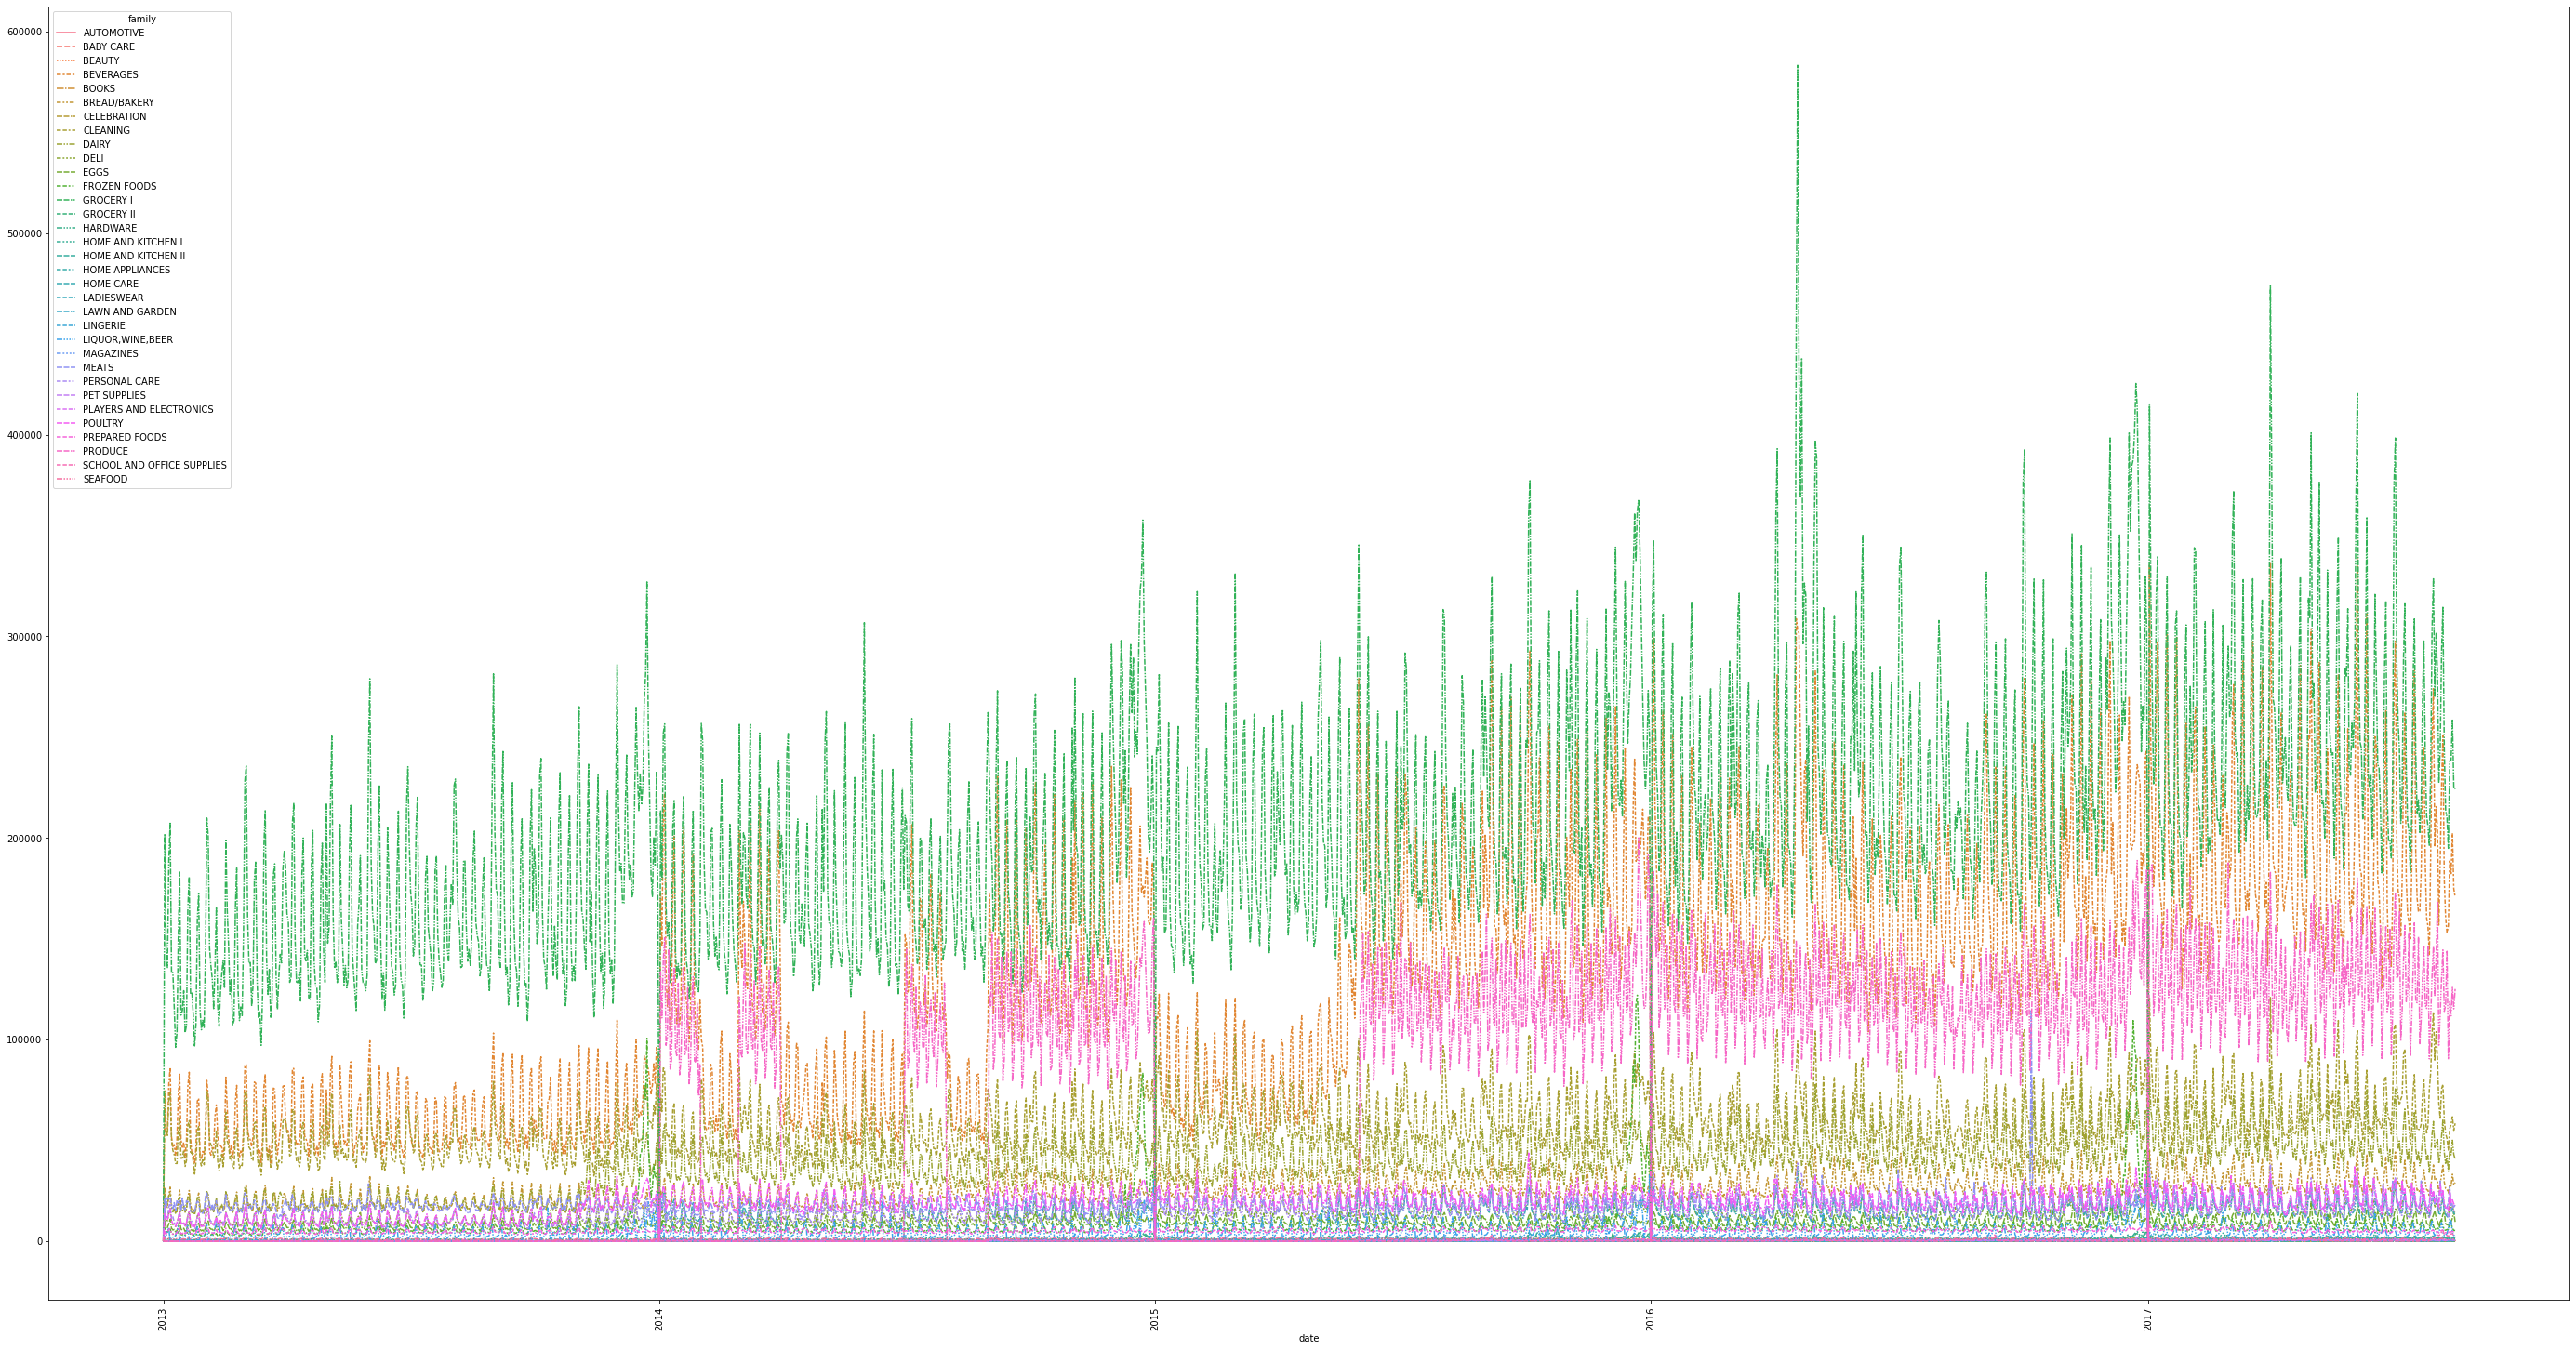

In [16]:
plt.figure(figsize = (40,20))
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain',axis='y')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()
sns.lineplot(data=sales_family_daily.T)
plt.show()

In [17]:
train_daily = train_info.copy()
train_daily["year"] = train_info["date"].dt.year
train_daily

date                      family   sales  year
0       2013-01-01                  AUTOMOTIVE    0.00  2013
1       2013-01-01                   BABY CARE    0.00  2013
2       2013-01-01                      BEAUTY    0.00  2013
3       2013-01-01                   BEVERAGES    0.00  2013
4       2013-01-01                       BOOKS    0.00  2013
...            ...                         ...     ...   ...
3000883 2017-08-15                     POULTRY  438.13  2017
3000884 2017-08-15              PREPARED FOODS  154.55  2017
3000885 2017-08-15                     PRODUCE 2419.73  2017
3000886 2017-08-15  SCHOOL AND OFFICE SUPPLIES  121.00  2017
3000887 2017-08-15                     SEAFOOD   16.00  2017

[3000888 rows x 4 columns]

In [18]:
train_daily[train_daily["year"] == 2013]

date                      family  sales  year
0      2013-01-01                  AUTOMOTIVE   0.00  2013
1      2013-01-01                   BABY CARE   0.00  2013
2      2013-01-01                      BEAUTY   0.00  2013
3      2013-01-01                   BEVERAGES   0.00  2013
4      2013-01-01                       BOOKS   0.00  2013
...           ...                         ...    ...   ...
648643 2013-12-31                     POULTRY 719.54  2013
648644 2013-12-31              PREPARED FOODS 103.06  2013
648645 2013-12-31                     PRODUCE   0.00  2013
648646 2013-12-31  SCHOOL AND OFFICE SUPPLIES   0.00  2013
648647 2013-12-31                     SEAFOOD  18.53  2013

[648648 rows x 4 columns]

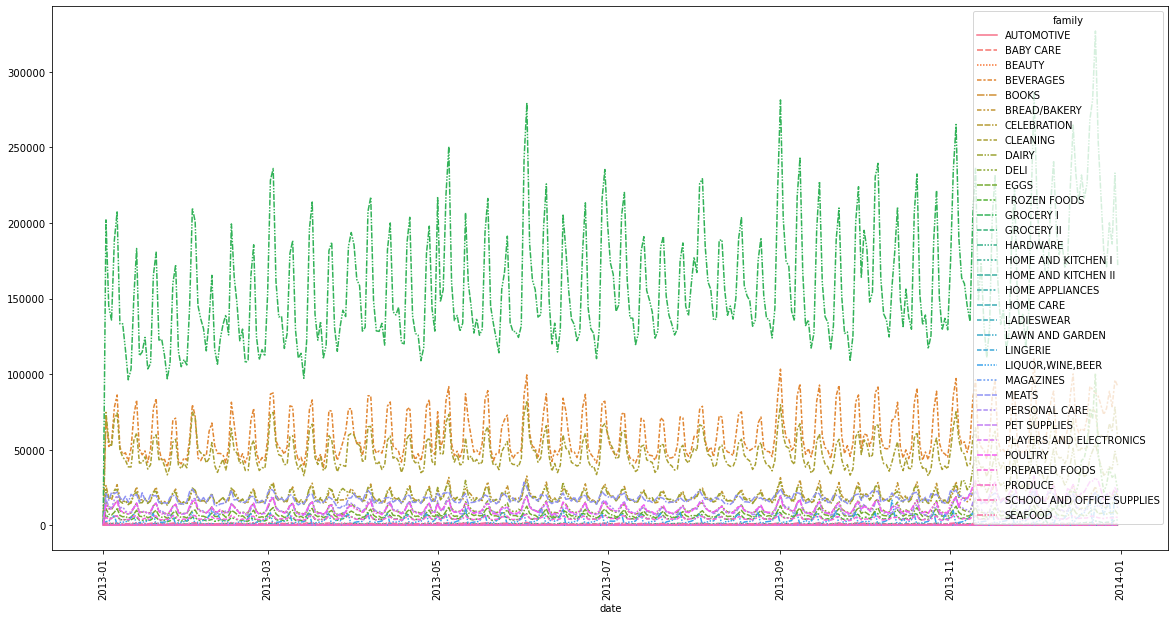

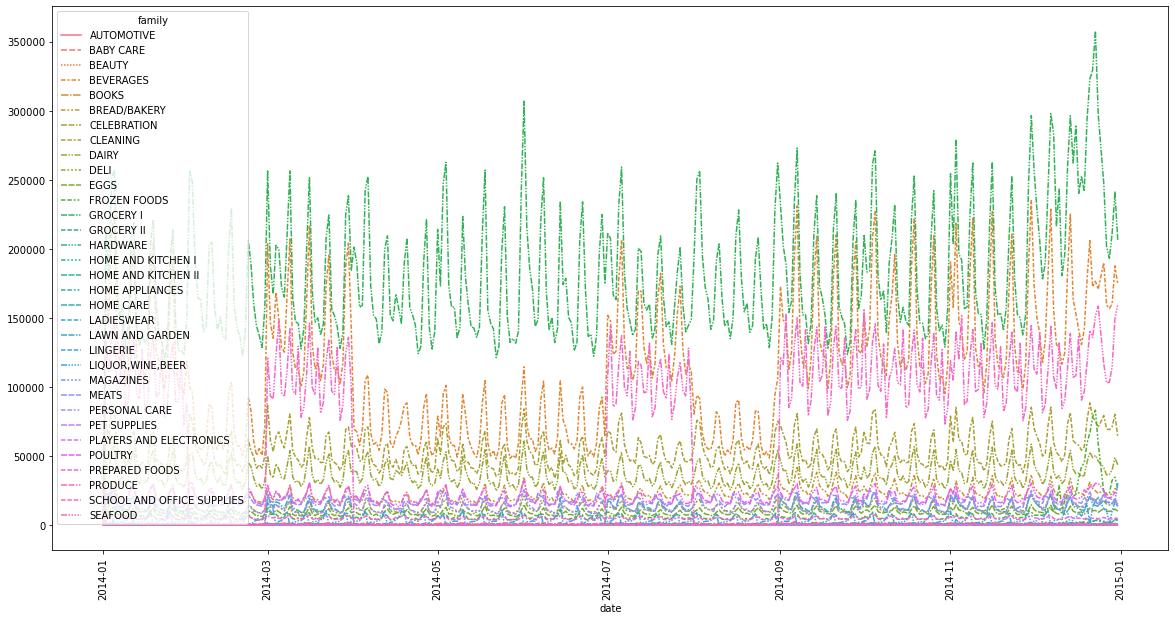

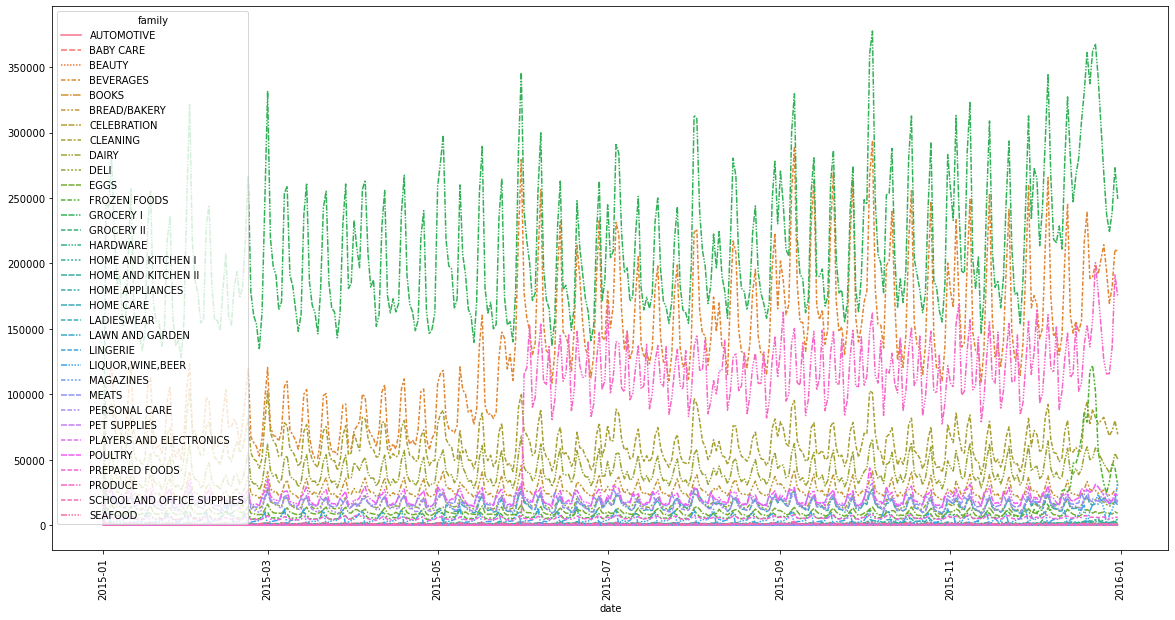

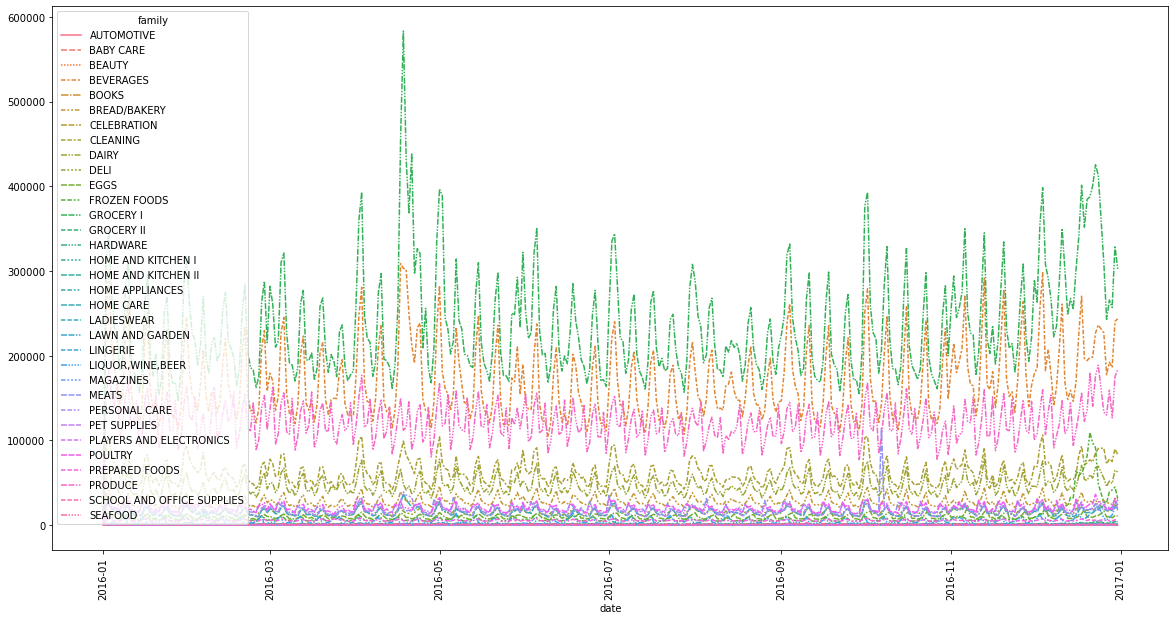

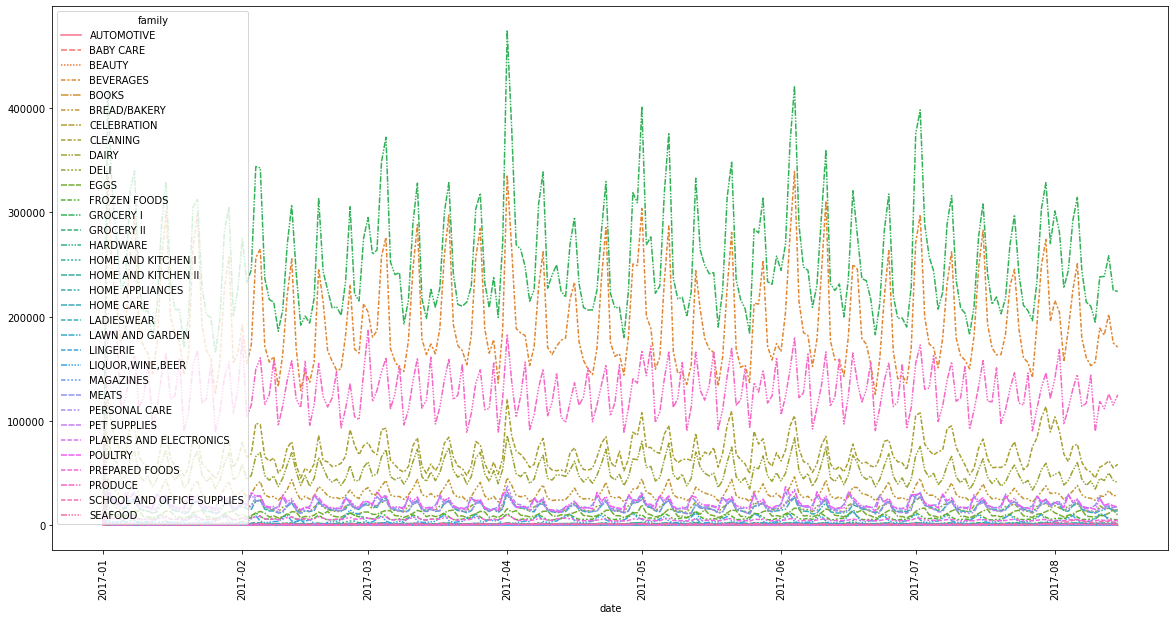

In [19]:
for i in [2013, 2014, 2015, 2016, 2017]:
    train_daily_year = train_daily[train_daily["year"] == i]
    train_info = train_daily_year[["date", "family", "sales"]]
    sales_family_daily = pd.pivot_table(train_info, values='sales', index='family', columns='date', aggfunc='sum', fill_value=0)
    
    plt.figure(figsize = (20,10))
    plt.xticks(rotation=90)
    plt.ticklabel_format(style='plain',axis='y')
    sns.lineplot(data=sales_family_daily.T)
    plt.show()

In [20]:
oil["date"] = pd.to_datetime(oil["date"])
oil

date  dcoilwtico
0    2013-01-01         NaN
1    2013-01-02       93.14
2    2013-01-03       92.97
3    2013-01-04       93.12
4    2013-01-05         NaN
...         ...         ...
1699 2017-08-27         NaN
1700 2017-08-28       46.40
1701 2017-08-29       46.46
1702 2017-08-30       45.96
1703 2017-08-31       47.26

[1704 rows x 2 columns]

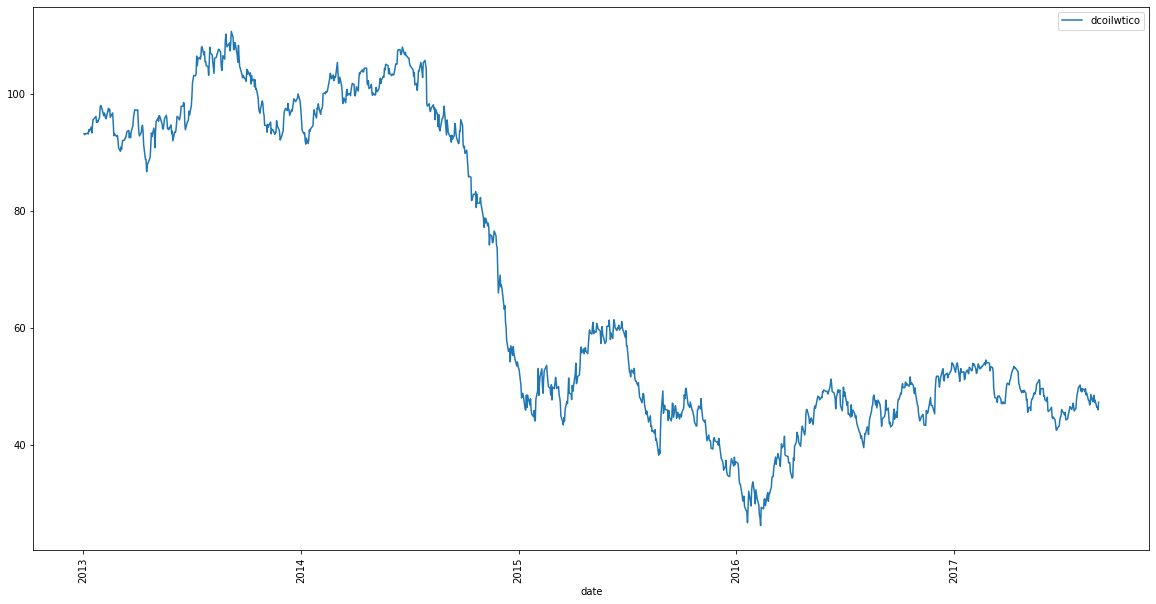

In [21]:
plt.figure(figsize = (20,10))
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain',axis='y')

sns.lineplot(data=oil.set_index("date"))
plt.show()

# 原油価格が下がることによって、輸入コストが減少するため、売り上げが増えるという仮定

In [22]:
# 2013年～2017年の日ごとの売り上げ推移をみる
train_info = train[["date", "family", "sales"]]
train_info["date"] = pd.to_datetime(train_info["date"])
sales_family_daily = pd.pivot_table(train_info, values='sales', index='family', columns='date', aggfunc='sum', fill_value=0)
# sales_family_daily 

C:\Users\seiju\AppData\Local\Temp\ipykernel_10056\696330268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_info["date"] = pd.to_datetime(train_info["date"])


In [23]:
sales_family_daily.T.index
# .T.reset_index(drop=False).set_index('date').columns

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1684, freq=None)

In [24]:
!pip install japanize_matplotlib

  Using cached japanize_matplotlib-1.1.3-py3-none-any.whl


(0.0, 120.62)

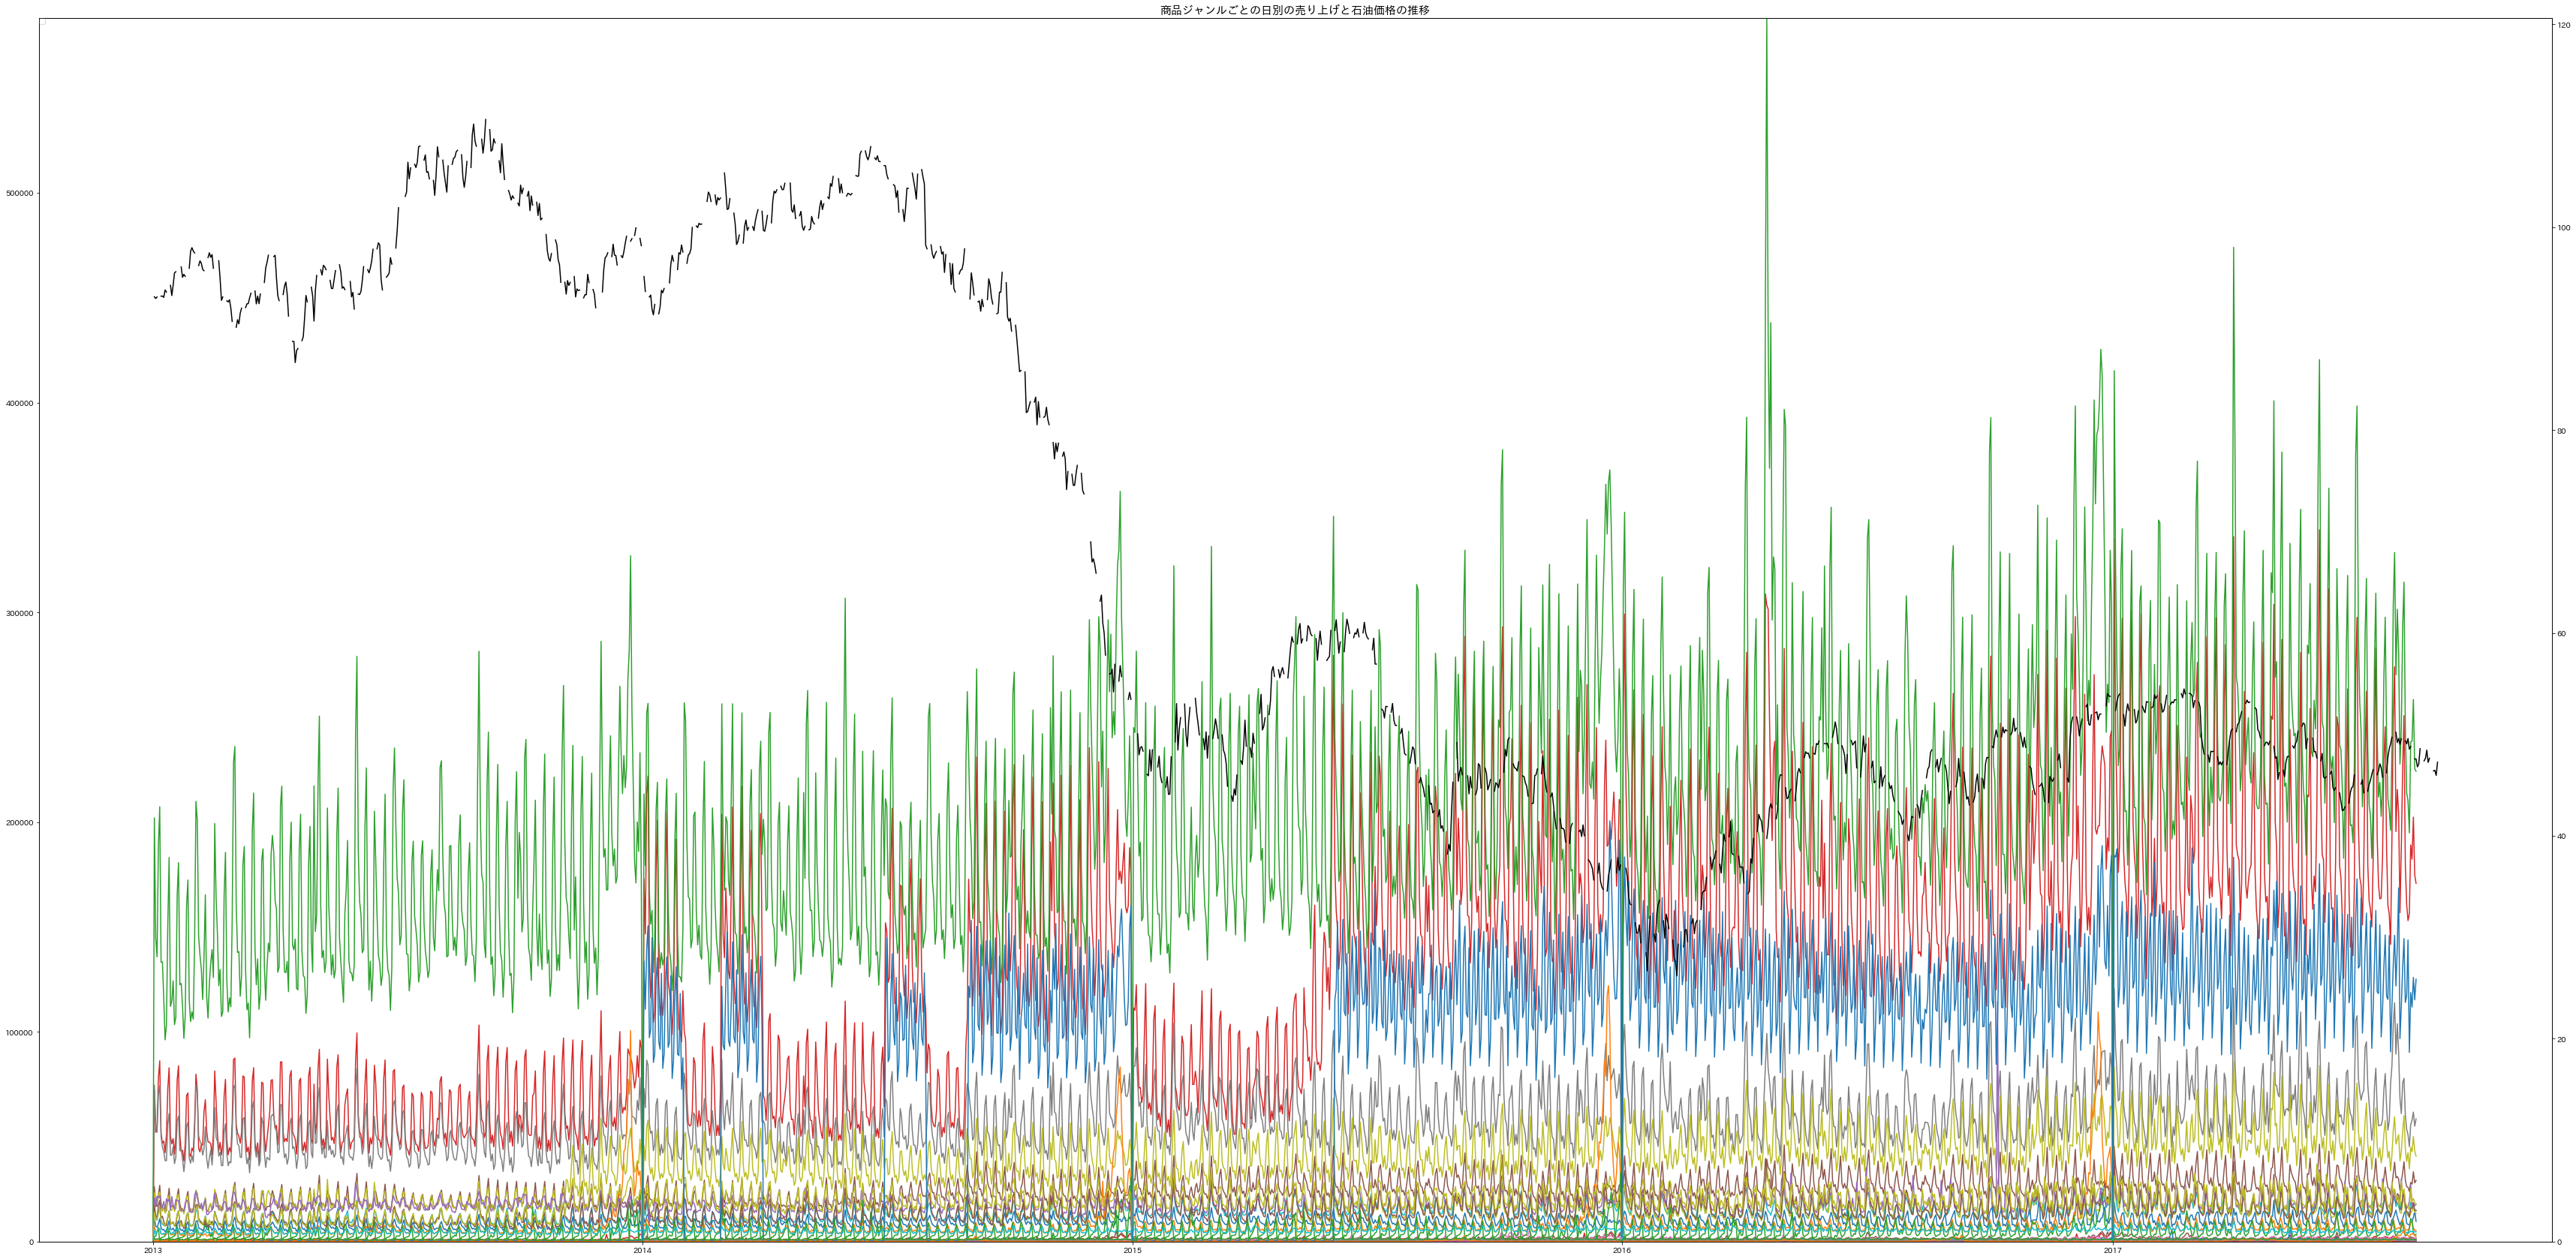

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import japanize_matplotlib
%matplotlib inline

sales_family_daily = sales_family_daily.T

fig, ax1 = plt.subplots(1,1, figsize = (60,30))
ax2 = ax1.twinx()
# 2軸グラフの本体設定
for column in sales_family_daily.columns:
    ax1.plot(sales_family_daily.index, sales_family_daily[column])

ax2.plot(oil['date'], oil['dcoilwtico'], color='000000')
#グラフタイトルを付ける
plt.title("商品ジャンルごとの日別の売り上げと石油価格の推移", fontsize=15)
# plt.figure(figsize = (40,20))
# plt.xticks(rotation=90)
# plt.ticklabel_format(style='plain',axis='y')
# plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# 凡例の表示のため、handler1と2にはグラフオブジェクトのリスト情報が入る
# label1と2には、凡例用に各labelのリスト情報が入る
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)
sales_max = 100 + sales_family_daily.max().max()
oil_max = 10 + oil["dcoilwtico"].max()
ax1.set_ylim([0, sales_max])
ax2.set_ylim([0, oil_max])
# plt.show()

In [26]:
# ①train.csv + oil.csv 
# ②train.csv + stores = .csv 
# ③train.csv + holidays_events.csv

# dateの列をstringからdatetime型に変換
oil["date"] = pd.to_datetime(oil["date"])
train["date"] = pd.to_datetime(train["date"])
holidays_events["date"] = pd.to_datetime(holidays_events["date"])

# データ作成
train = train[train['sales'] != 0]
oil = oil.set_index('date').interpolate(limit=3, limit_direction='backward')
train_oil = train.merge(oil, on="date")
train_oil_stores = train_oil.merge(store, on="store_nbr")
train_oil_stores = train_oil_stores.rename(columns={"type":"store_type"})
# train_oil_stores_holiday = train_oil_stores.merge(holidays_events, on="date")
# train_oil_stores_holiday = train_oil_stores_holiday.rename(columns={"type":"holiday_type"})
# train_oil_stores_holiday

In [27]:
#最大表示行数の指定（ここでは50行を指定）
pd.set_option('display.max_rows', 100)
train_oil_stores

id       date  store_nbr                      family   sales  \
0            563 2013-01-01         25                      BEAUTY    2.00   
1            564 2013-01-01         25                   BEVERAGES  810.00   
2            566 2013-01-01         25                BREAD/BAKERY  180.59   
3            568 2013-01-01         25                    CLEANING  186.00   
4            569 2013-01-01         25                       DAIRY  143.00   
...          ...        ...        ...                         ...     ...   
2061753  3000685 2017-08-15         52                     POULTRY  397.34   
2061754  3000686 2017-08-15         52              PREPARED FOODS  104.42   
2061755  3000687 2017-08-15         52                     PRODUCE 3803.37   
2061756  3000688 2017-08-15         52  SCHOOL AND OFFICE SUPPLIES   17.00   
2061757  3000689 2017-08-15         52                     SEAFOOD    7.00   

         onpromotion  dcoilwtico     city        state store_type  cluster  
0                  0       93.14  Salinas  Santa Elena          D        1  
1                  0       93.14  Salinas  Santa Elena          D        1  
2                  0       93.14  Salinas  Santa Elena          D        1  
3                  0       93.14  Salinas  Santa Elena          D        1  
4                  0       93.14  Salinas  Santa Elena          D        1  
...              ...         ...      ...          ...        ...      ...  
2061753            0       47.57    Manta       Manabi          A       11  
2061754            0       47.57    Manta       Manabi          A       11  
2061755            8       47.57    Manta       Manabi          A       11  
2061756            0       47.57    Manta       Manabi          A       11  
2061757            0       47.57    Manta       Manabi          A       11  

[2061758 rows x 11 columns]

In [28]:
# train_oil_stores_holiday["holiday_type"].value_counts()
# holiday : 通常の休日
# Event :　イベント休日？
# Additional : 追加された休日（クリスマス直前とかついで連休みたいなイメージ）
# Transfer : 移動された休日（おそらくTranseferの直線のholidayはholidayじゃなく平日に変化している）
# Bridge: 

In [29]:
# 相関係数の考察

# 仮説立案

# 仮説検証

In [30]:
# カテゴリ変数↓
 # family
 # city + state
 # store_type
 # type

# 保留
 # cluster
 # locale + locale_name

# 使わない
# store_nbr
# description
# transferred
# onpromotion

In [31]:
train_oil_stores['year']  = train_oil_stores['date'].dt.year
train_oil_stores['month'] = train_oil_stores['date'].dt.month
train_oil_stores['day'] = train_oil_stores['date'].dt.day
train_oil_stores['dayofweek'] = train_oil_stores['date'].dt.dayofweek
train_oil_stores

id       date  store_nbr                      family   sales  \
0            563 2013-01-01         25                      BEAUTY    2.00   
1            564 2013-01-01         25                   BEVERAGES  810.00   
2            566 2013-01-01         25                BREAD/BAKERY  180.59   
3            568 2013-01-01         25                    CLEANING  186.00   
4            569 2013-01-01         25                       DAIRY  143.00   
...          ...        ...        ...                         ...     ...   
2061753  3000685 2017-08-15         52                     POULTRY  397.34   
2061754  3000686 2017-08-15         52              PREPARED FOODS  104.42   
2061755  3000687 2017-08-15         52                     PRODUCE 3803.37   
2061756  3000688 2017-08-15         52  SCHOOL AND OFFICE SUPPLIES   17.00   
2061757  3000689 2017-08-15         52                     SEAFOOD    7.00   

         onpromotion  dcoilwtico     city        state store_type  cluster  \
0                  0       93.14  Salinas  Santa Elena          D        1   
1                  0       93.14  Salinas  Santa Elena          D        1   
2                  0       93.14  Salinas  Santa Elena          D        1   
3                  0       93.14  Salinas  Santa Elena          D        1   
4                  0       93.14  Salinas  Santa Elena          D        1   
...              ...         ...      ...          ...        ...      ...   
2061753            0       47.57    Manta       Manabi          A       11   
2061754            0       47.57    Manta       Manabi          A       11   
2061755            8       47.57    Manta       Manabi          A       11   
2061756            0       47.57    Manta       Manabi          A       11   
2061757            0       47.57    Manta       Manabi          A       11   

         year  month  day  dayofweek  
0        2013      1    1          1  
1        2013      1    1          1  
2        2013      1    1          1  
3        2013      1    1          1  
4        2013      1    1          1  
...       ...    ...  ...        ...  
2061753  2017      8   15          1  
2061754  2017      8   15          1  
2061755  2017      8   15          1  
2061756  2017      8   15          1  
2061757  2017      8   15          1  

[2061758 rows x 15 columns]

In [32]:
train_oil_stores = train_oil_stores.drop(["date"
                                          , "store_nbr"
#                                           , "onpromotion"
                                         ], axis=1)
train_oil_stores

id                      family   sales  onpromotion  dcoilwtico  \
0            563                      BEAUTY    2.00            0       93.14   
1            564                   BEVERAGES  810.00            0       93.14   
2            566                BREAD/BAKERY  180.59            0       93.14   
3            568                    CLEANING  186.00            0       93.14   
4            569                       DAIRY  143.00            0       93.14   
...          ...                         ...     ...          ...         ...   
2061753  3000685                     POULTRY  397.34            0       47.57   
2061754  3000686              PREPARED FOODS  104.42            0       47.57   
2061755  3000687                     PRODUCE 3803.37            8       47.57   
2061756  3000688  SCHOOL AND OFFICE SUPPLIES   17.00            0       47.57   
2061757  3000689                     SEAFOOD    7.00            0       47.57   

            city        state store_type  cluster  year  month  day  dayofweek  
0        Salinas  Santa Elena          D        1  2013      1    1          1  
1        Salinas  Santa Elena          D        1  2013      1    1          1  
2        Salinas  Santa Elena          D        1  2013      1    1          1  
3        Salinas  Santa Elena          D        1  2013      1    1          1  
4        Salinas  Santa Elena          D        1  2013      1    1          1  
...          ...          ...        ...      ...   ...    ...  ...        ...  
2061753    Manta       Manabi          A       11  2017      8   15          1  
2061754    Manta       Manabi          A       11  2017      8   15          1  
2061755    Manta       Manabi          A       11  2017      8   15          1  
2061756    Manta       Manabi          A       11  2017      8   15          1  
2061757    Manta       Manabi          A       11  2017      8   15          1  

[2061758 rows x 13 columns]

In [33]:
train_oil_stores = train_oil_stores.set_index("id")
# train_oil_stores_holiday = train_oil_stores_holiday.reset_index()
train_oil_stores

family   sales  onpromotion  dcoilwtico     city  \
id                                                                              
563                          BEAUTY    2.00            0       93.14  Salinas   
564                       BEVERAGES  810.00            0       93.14  Salinas   
566                    BREAD/BAKERY  180.59            0       93.14  Salinas   
568                        CLEANING  186.00            0       93.14  Salinas   
569                           DAIRY  143.00            0       93.14  Salinas   
...                             ...     ...          ...         ...      ...   
3000685                     POULTRY  397.34            0       47.57    Manta   
3000686              PREPARED FOODS  104.42            0       47.57    Manta   
3000687                     PRODUCE 3803.37            8       47.57    Manta   
3000688  SCHOOL AND OFFICE SUPPLIES   17.00            0       47.57    Manta   
3000689                     SEAFOOD    7.00            0       47.57    Manta   

               state store_type  cluster  year  month  day  dayofweek  
id                                                                     
563      Santa Elena          D        1  2013      1    1          1  
564      Santa Elena          D        1  2013      1    1          1  
566      Santa Elena          D        1  2013      1    1          1  
568      Santa Elena          D        1  2013      1    1          1  
569      Santa Elena          D        1  2013      1    1          1  
...              ...        ...      ...   ...    ...  ...        ...  
3000685       Manabi          A       11  2017      8   15          1  
3000686       Manabi          A       11  2017      8   15          1  
3000687       Manabi          A       11  2017      8   15          1  
3000688       Manabi          A       11  2017      8   15          1  
3000689       Manabi          A       11  2017      8   15          1  

[2061758 rows x 12 columns]

In [34]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(sparse=False)

# arr = encoder.fit_transform(train_oil_stores_holiday[['family',
#                                                       'city', 
#                                                       'state', 
#                                                       'store_type', 
#                                                       'holiday_type', 
#                                                       'locale', 
#                                                       'locale_name']].values.reshape(-1, 1))

# df_onehot = pd.DataFrame(arr, columns=encoder.categories_)
# df_onehot

# # 列名を取得
# label = ohe.get_feature_names(['Embarked', 'Sex'])

# # データフレーム化
# df_ = pd.DataFrame(encoded, columns=label, dtype=np.int8)

# # データフレームを結合
# pd.concat([df, df_], axis=1)


In [35]:
# col_list = ['family','city', 'state', 'store_type', 'holiday_type','locale','locale_name']
col_list = ['family','city', 'state', 'store_type', 'cluster','year', 'month']
df = pd.get_dummies(train_oil_stores, columns=col_list, sparse=True)

In [36]:
df.columns

Index(['sales', 'onpromotion', 'dcoilwtico', 'day', 'dayofweek',
       'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS',
       ...
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object', length=115)

In [37]:
# df = df.drop(['holiday_type_Additional',
#               'holiday_type_Bridge', 
#               'holiday_type_Event',
#               'holiday_type_Transfer'], axis=1)

In [38]:
pd.set_option('display.max_rows', 140)
df_notnull = df[df["dcoilwtico"].notnull()]
df_notnull.isnull().sum()

sales                                   0
onpromotion                             0
dcoilwtico                              0
day                                     0
dayofweek                               0
family_AUTOMOTIVE                       0
family_BABY CARE                        0
family_BEAUTY                           0
family_BEVERAGES                        0
family_BOOKS                            0
family_BREAD/BAKERY                     0
family_CELEBRATION                      0
family_CLEANING                         0
family_DAIRY                            0
family_DELI                             0
family_EGGS                             0
family_FROZEN FOODS                     0
family_GROCERY I                        0
family_GROCERY II                       0
family_HARDWARE                         0
family_HOME AND KITCHEN I               0
family_HOME AND KITCHEN II              0
family_HOME APPLIANCES                  0
family_HOME CARE                  

In [39]:
df_notnull

sales  onpromotion  dcoilwtico  day  dayofweek  family_AUTOMOTIVE  \
id                                                                            
563        2.00            0       93.14    1          1                  0   
564      810.00            0       93.14    1          1                  0   
566      180.59            0       93.14    1          1                  0   
568      186.00            0       93.14    1          1                  0   
569      143.00            0       93.14    1          1                  0   
...         ...          ...         ...  ...        ...                ...   
3000685  397.34            0       47.57   15          1                  0   
3000686  104.42            0       47.57   15          1                  0   
3000687 3803.37            8       47.57   15          1                  0   
3000688   17.00            0       47.57   15          1                  0   
3000689    7.00            0       47.57   15          1                  0   

         family_BABY CARE  family_BEAUTY  family_BEVERAGES  family_BOOKS  ...  \
id                                                                        ...   
563                     0              1                 0             0  ...   
564                     0              0                 1             0  ...   
566                     0              0                 0             0  ...   
568                     0              0                 0             0  ...   
569                     0              0                 0             0  ...   
...                   ...            ...               ...           ...  ...   
3000685                 0              0                 0             0  ...   
3000686                 0              0                 0             0  ...   
3000687                 0              0                 0             0  ...   
3000688                 0              0                 0             0  ...   
3000689                 0              0                 0             0  ...   

         month_3  month_4  month_5  month_6  month_7  month_8  month_9  \
id                                                                       
563            0        0        0        0        0        0        0   
564            0        0        0        0        0        0        0   
566            0        0        0        0        0        0        0   
568            0        0        0        0        0        0        0   
569            0        0        0        0        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
3000685        0        0        0        0        0        1        0   
3000686        0        0        0        0        0        1        0   
3000687        0        0        0        0        0        1        0   
3000688        0        0        0        0        0        1        0   
3000689        0        0        0        0        0        1        0   

         month_10  month_11  month_12  
id                                     
563             0         0         0  
564             0         0         0  
566             0         0         0  
568             0         0         0  
569             0         0         0  
...           ...       ...       ...  
3000685         0         0         0  
3000686         0         0         0  
3000687         0         0         0  
3000688         0         0         0  
3000689         0         0         0  

[2060196 rows x 115 columns]

In [40]:
x = df_notnull.iloc[:,1:]
y = df_notnull["sales"]

In [ ]:
!pip install pycaret 
# --ignore-installed llvmlite

In [ ]:
!pip install numpy==1.20

In [ ]:
from pycaret.regression import *
exp1 = setup(data = df_notnull, target = 'sales', session_id=123)
# compare_models()

In [ ]:
# 初回
# model = create_model('lightgbm')
# パラメータ調整後
model = create_model('rf', fold=5)

In [ ]:
tuned_model = tune_model(model, optimize = 'RMSE', fold=5)

In [ ]:
# モデルの評価指標を確認
evaluate_model(tuned_model)

In [ ]:
final_model = finalize_model(tuned_model)

In [ ]:
oil

In [ ]:
# ①train.csv + oil.csv 
# ②train.csv + stores = .csv 
# ③train.csv + holidays_events.csv

# dateの列をstringからdatetime型に変換
test["date"] = pd.to_datetime(test["date"])

# データ作成
oil = oil.set_index('date').interpolate(limit=3, limit_direction='backward')
test_oil = test.merge(oil, on="date", how="inner")
test_oil_stores = test_oil.merge(store, on="store_nbr")
test_oil_stores = test_oil_stores.rename(columns={"type":"store_type"})
# test_oil_stores_holiday = test_oil_stores.merge(holidays_events, on="date", how="left")
# test_oil_stores_holiday = test_oil_stores_holiday.rename(columns={"type":"holiday_type"})
# test_oil_stores_holiday
test_oil_stores['year']  = test_oil_stores['date'].dt.year
test_oil_stores['month'] = test_oil_stores['date'].dt.month
test_oil_stores['day'] = test_oil_stores['date'].dt.day
test_oil_stores['dayofweek'] = test_oil_stores['date'].dt.dayofweek
test_oil_stores = test_oil_stores.drop(["date"
                                        , "store_nbr"
#                                         , "onpromotion"
                                       ], axis=1)
test_oil_stores = test_oil_stores.set_index("id")

# col_list = ['family','city', 'state', 'store_type', 'holiday_type','locale','locale_name']
col_list = ['family','city', 'state', 'store_type', 'cluster','year', 'month']
test_df = pd.get_dummies(test_oil_stores, columns=col_list, sparse=True)
test_df

In [ ]:
pred = predict_model(final_model, data = test_df)

In [ ]:
pred.reset_index()[["id","Label"]].rename(columns={"Label":"sales"})

In [ ]:
pred = pred.reset_index()[["id","Label"]].rename(columns={"Label":"sales"})

In [ ]:
# pred[pred['sales'] <= 0].sort_values('sales',ascending=True)

In [ ]:
pred[pred['sales'] <= 0]['sales'] = 0

pred.loc[pred['sales'] < 0, 'sales'] = 0

In [ ]:
pred

In [ ]:
sample_submission = pd.read_csv('../Dataset/store-sales-time-series-forecasting/sample_submission.csv')


In [ ]:
sample_submission

In [ ]:
test

In [ ]:
pred.to_csv('forecasting-store-sales.csv', index = False)